In [5]:
import pandas as pd
import numpy as np

# Loading the dataset with low_memory=False to handle mixed data types
try:
    loan_df = pd.read_csv('C:/Users/Abhinav.Jha/AppData/Roaming/jupyter/loan.csv', low_memory=False)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: CSV file not found. Please check the file path.")
    raise
except pd.errors.EmptyDataError:
    print("Error: The CSV file is empty.")
    raise
except pd.errors.ParserError:
    print("Error: Unable to parse the CSV file. It may be corrupted or in an unexpected format.")
    raise

# Droping columns with more than 50% missing values
loan_df = loan_df.dropna(thresh=len(loan_df) * 0.5, axis=1)
print(f"Shape after dropping columns with >50% missing values: {loan_df.shape}")

# Handling specific columns (convert interest rate to numeric, etc.)
if 'int_rate' in loan_df.columns:
    loan_df['int_rate'] = loan_df['int_rate'].replace('%', '', regex=True).astype(float)
    print("Converted 'int_rate' to numeric.")
else:
    print("Warning: 'int_rate' column not found in the dataset.")

# Filling missing values in key columns
if 'mths_since_last_delinq' in loan_df.columns:
    median_delinq = loan_df['mths_since_last_delinq'].median()
    loan_df['mths_since_last_delinq'] = loan_df['mths_since_last_delinq'].fillna(median_delinq)
    print("Filled missing values in 'mths_since_last_delinq'.")
else:
    print("Warning: 'mths_since_last_delinq' column not found in the dataset.")

# Displaying info about the dataframe
print("\nDataset Info:")
print(loan_df.info())

# Displaying the first few rows
print("\nFirst few rows of the dataset:")
print(loan_df.head())

# Displaying column names
print("\nColumn names:")
print(loan_df.columns.tolist())

Dataset loaded successfully.
Shape after dropping columns with >50% missing values: (39717, 54)
Converted 'int_rate' to numeric.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  e

In [20]:
UNIVARIATE ANALYSIS

SyntaxError: invalid syntax (3944309811.py, line 1)

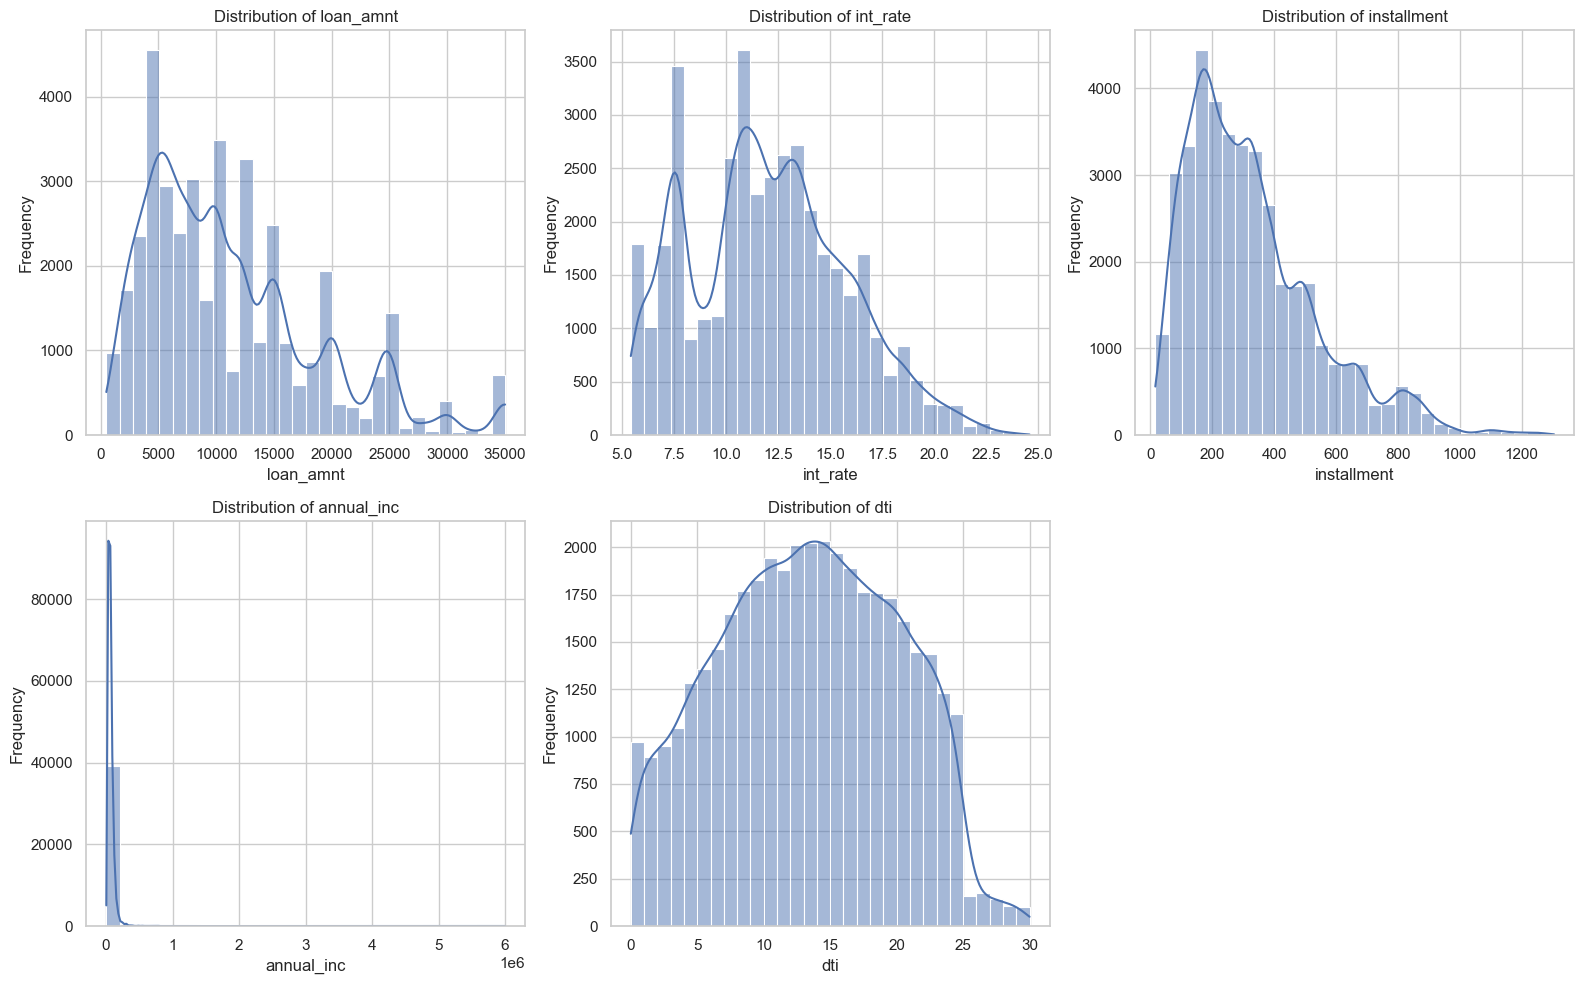

The following columns were not found in the dataframe: mths_since_last_delinq
Plotted distributions for: loan_amnt, int_rate, installment, annual_inc, dti


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visual style
sns.set(style="whitegrid")

# Defining the list of columns we want to plot
desired_columns = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'mths_since_last_delinq']

# Filterinng the list to include only columns that actually exist in the dataframe
numerical_columns = [col for col in desired_columns if col in loan_df.columns]

# Calculating the number of rows and columns for the subplot grid
n_cols = 3
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols

# Plotting distributions of these key variables
plt.figure(figsize=(16, 5*n_rows))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(loan_df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print information about missing columns
missing_columns = set(desired_columns) - set(numerical_columns)
if missing_columns:
    print(f"The following columns were not found in the dataframe: {', '.join(missing_columns)}")
print(f"Plotted distributions for: {', '.join(numerical_columns)}")


In [ ]:
BIVARIATE ANALYSIS

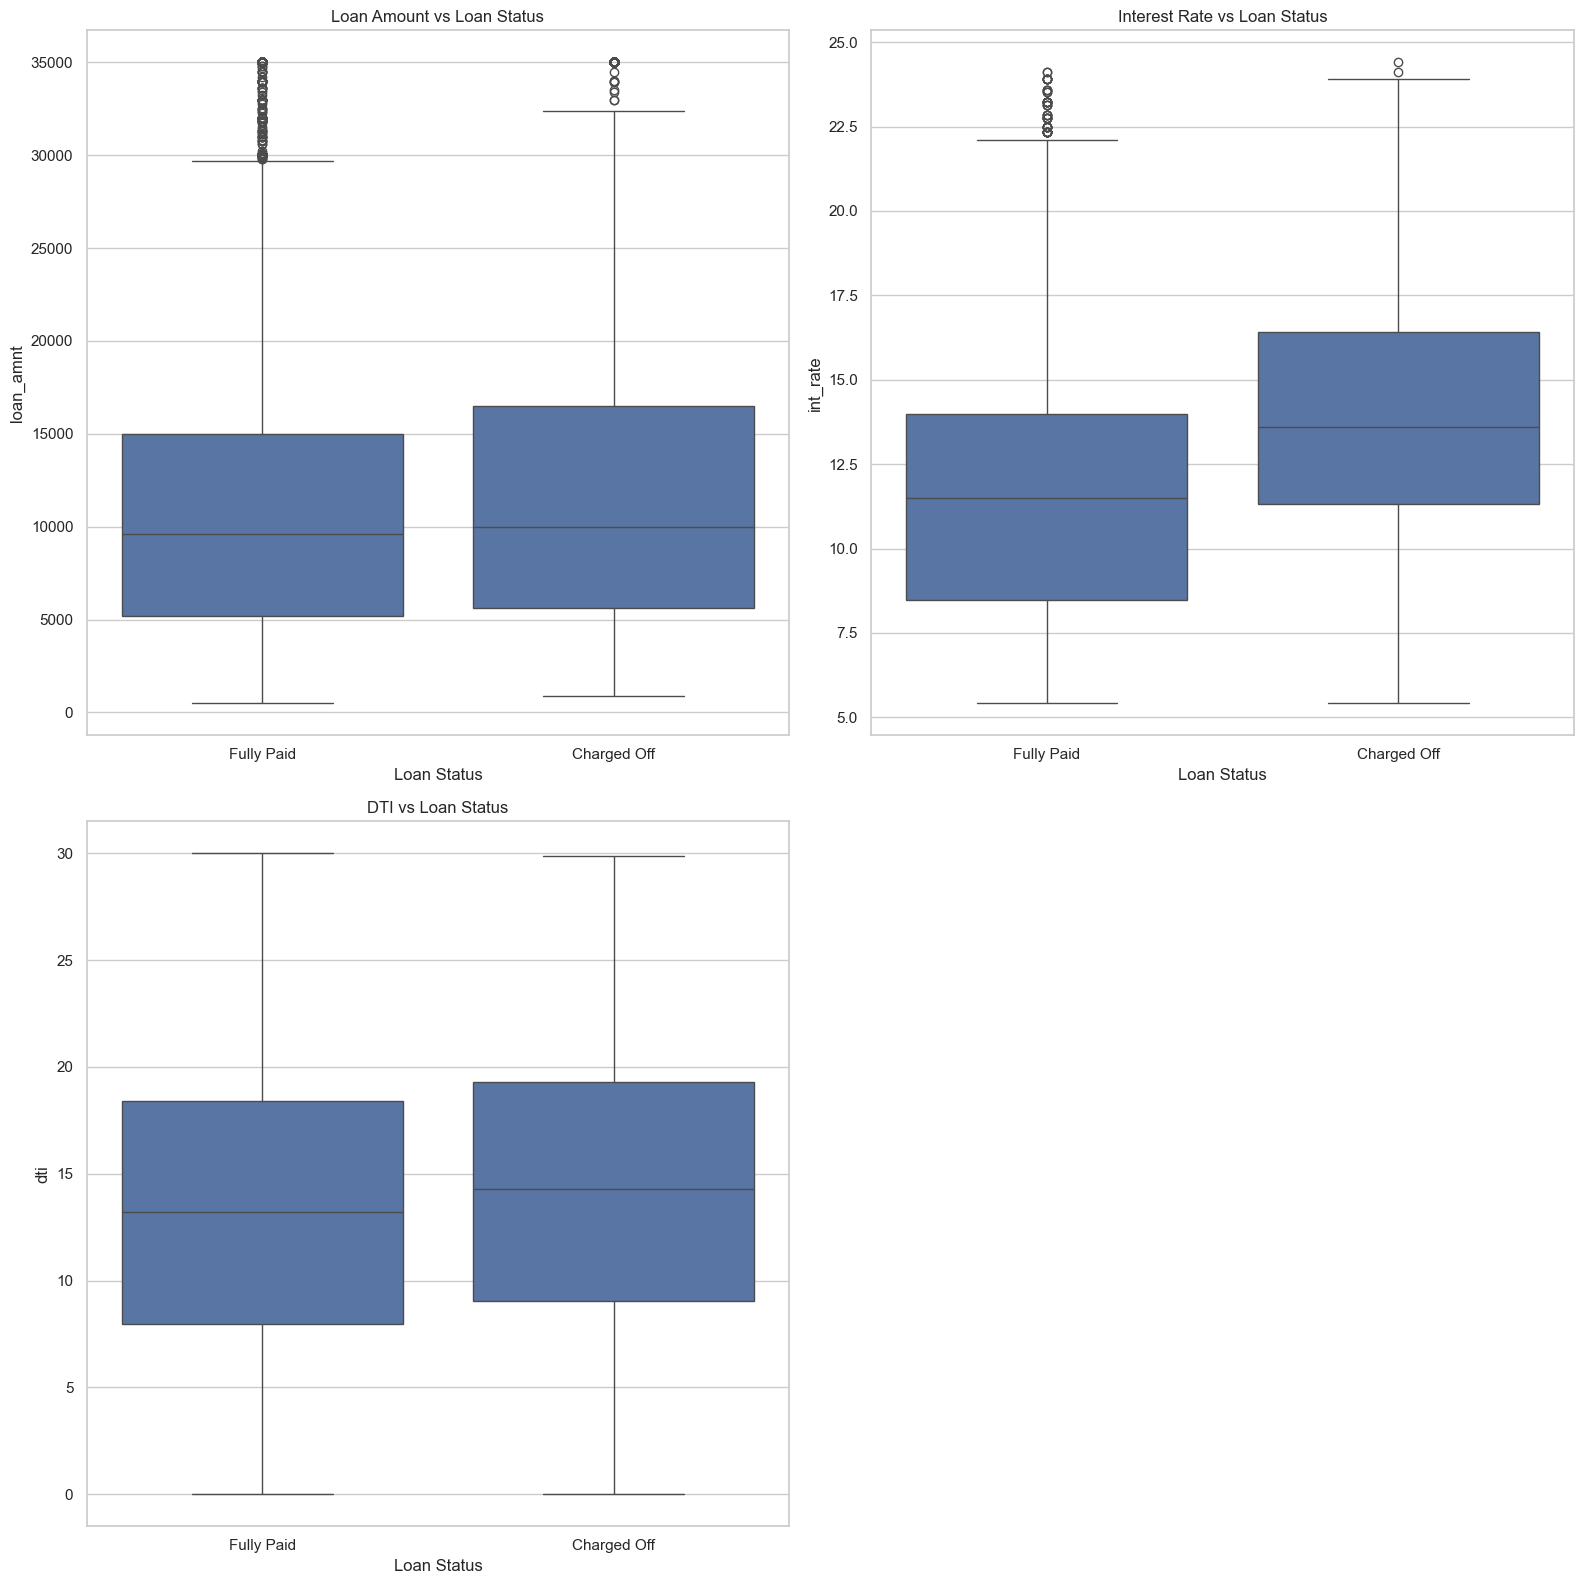

The following columns were not found in the dataframe: mths_since_last_delinq
Created plots for: loan_amnt, int_rate, dti


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering out 'Current' status for clarity
filtered_loan_df = loan_df[loan_df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

# Defining the plots we want to create
plots = [
    ('loan_amnt', 'Loan Amount vs Loan Status'),
    ('int_rate', 'Interest Rate vs Loan Status'),
    ('dti', 'DTI vs Loan Status'),
    ('mths_since_last_delinq', 'Months Since Last Delinquency vs Loan Status')
]

# Filtering out plots for columns that don't exist in the dataframe
available_plots = [plot for plot in plots if plot[0] in filtered_loan_df.columns]

# Calculating the number of rows needed
n_rows = (len(available_plots) + 1) // 2

# Create the plot
plt.figure(figsize=(16, 8 * n_rows))

for i, (column, title) in enumerate(available_plots, 1):
    plt.subplot(n_rows, 2, i)
    sns.boxplot(data=filtered_loan_df, x='loan_status', y=column)
    plt.title(title)
    plt.xlabel('Loan Status')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

# Print information about missing columns
missing_columns = set([plot[0] for plot in plots]) - set(filtered_loan_df.columns)
if missing_columns:
    print(f"The following columns were not found in the dataframe: {', '.join(missing_columns)}")
print(f"Created plots for: {', '.join([plot[0] for plot in available_plots])}")


In [ ]:
Correlation Analysis

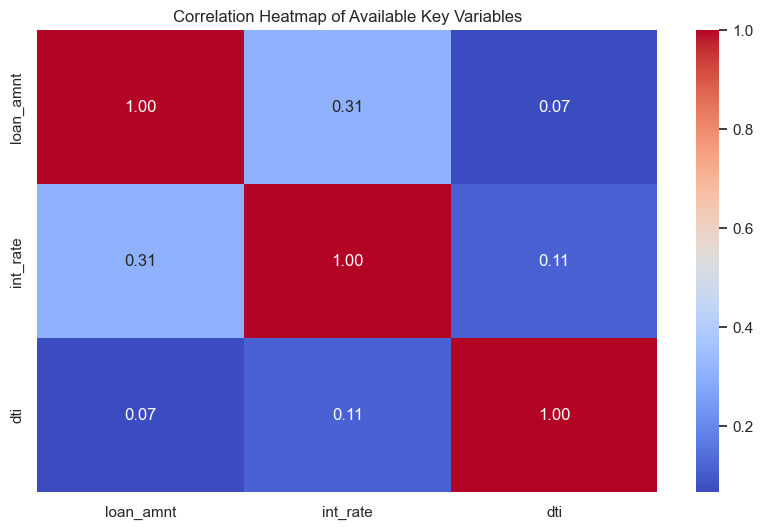

The following columns were not found in the dataframe: mths_since_last_delinq
Created correlation heatmap for: loan_amnt, int_rate, dti


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Defining the columns we want to include in the correlation
desired_columns = ['loan_amnt', 'int_rate', 'dti', 'mths_since_last_delinq']

# Filtering the list to include only columns that actually exist in the dataframe
correlation_columns = [col for col in desired_columns if col in loan_df.columns]

# Checking if we have at least two columns to correlate
if len(correlation_columns) < 2:
    print("Not enough columns to create a correlation matrix. Available columns:", correlation_columns)
else:
    # Calculating the correlation matrix
    correlation_matrix = loan_df[correlation_columns].corr()

    # Plotting the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title('Correlation Heatmap of Available Key Variables')
    plt.show()

# Printing information about missing columns
missing_columns = set(desired_columns) - set(correlation_columns)
if missing_columns:
    print(f"The following columns were not found in the dataframe: {', '.join(missing_columns)}")
print(f"Created correlation heatmap for: {', '.join(correlation_columns)}")

In [ ]:
SUMMARY TABLE

In [16]:
summary_df = pd.DataFrame({
    'Key Factors': [
        'Higher Interest Rates', 
        'Higher Debt-to-Income Ratio (DTI)', 
        'Recent Delinquency', 
        'Loan Amount'
    ],
    'Impact': [
        'Loans with higher interest rates have a higher likelihood of default.',
        'Borrowers with a higher DTI are more likely to default.',
        'Borrowers who have had recent delinquencies are at a higher risk of defaulting on new loans.',
        'The loan amount is less predictive of default compared to interest rates and DTI.'
    ]
})

print(summary_df)


                         Key Factors  \
0              Higher Interest Rates   
1  Higher Debt-to-Income Ratio (DTI)   
2                 Recent Delinquency   
3                        Loan Amount   

                                              Impact  
0  Loans with higher interest rates have a higher...  
1  Borrowers with a higher DTI are more likely to...  
2  Borrowers who have had recent delinquencies ar...  
3  The loan amount is less predictive of default ...  


In [ ]:
Visual 1: Histogram for Univariate Analysis (Loan Amount)

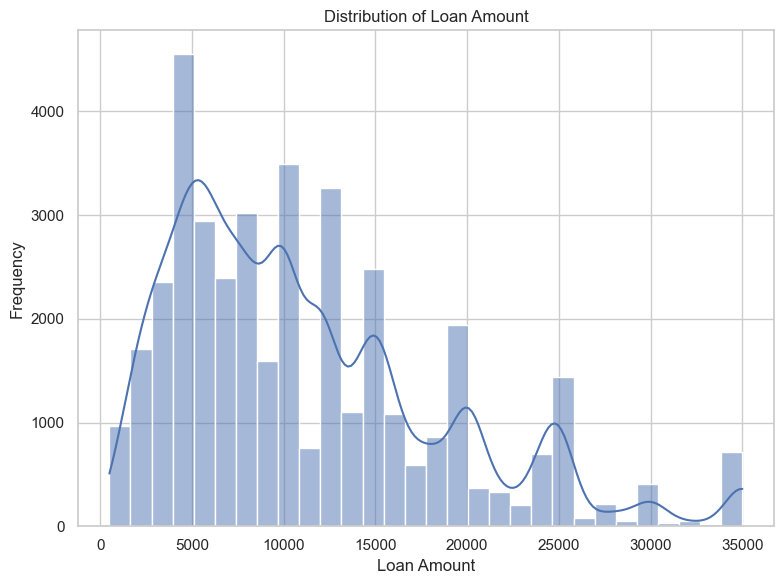

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(loan_df['loan_amnt'], kde=True, bins=30)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('univariate_analysis_loan_amount.png')
plt.show()


In [ ]:
Visual 2: Boxplot for Bivariate Analysis (Interest Rate vs Loan Status)


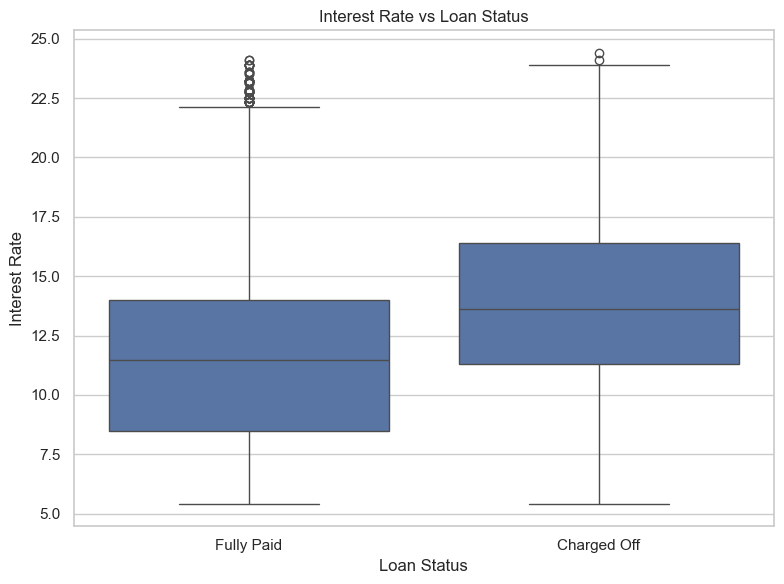

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_loan_df, x='loan_status', y='int_rate')
plt.title('Interest Rate vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.tight_layout()
plt.savefig('bivariate_analysis_interest_rate.png')
plt.show()


In [ ]:
Visual 3: Correlation Heatmap

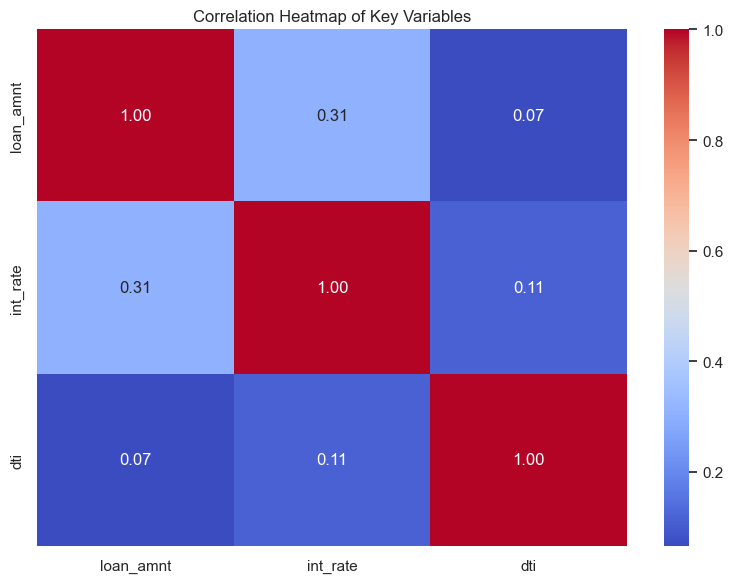

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap of Key Variables')
plt.tight_layout()
plt.savefig('correlation_analysis_heatmap.png')
plt.show()
